In [1]:
#!python -m pip install stumpy

In [2]:
import yfinance as yf
import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

In [3]:
cat=yf.Ticker('CAT')
cat

yfinance.Ticker object <CAT>

In [4]:
x=cat.history(start='2020-1-1',end='2022-2-2')

In [5]:
x['Date']=x.index

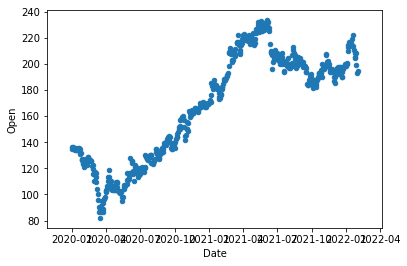

In [6]:
x.plot.scatter(x='Date',y='Open')

In [7]:
m=30
mp=stumpy.stump(x['Open'],m)
mp

array([[1.6943887813912888, 29, -1, 29],
       [1.7465371231040048, 30, -1, 30],
       [1.8247047758281705, 31, -1, 31],
       ...,
       [2.3806454453932426, 243, 243, -1],
       [2.7511195939659623, 244, 244, -1],
       [3.0311630492429202, 245, 245, -1]], dtype=object)

In [8]:
mp.shape

(498, 4)

In [9]:
type(mp)

numpy.ndarray

In [10]:
mp=mp.astype(np.float32)

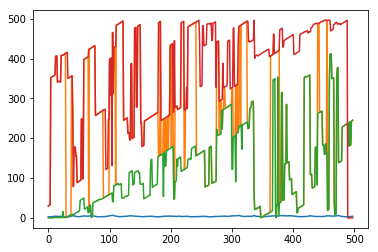

In [11]:
for i in range(mp.shape[1]):
    plt.plot(mp[:,i])

In [12]:
motif_idx=np.argsort(mp[:,0])[0]
nearest_neighbor_idx1=mp[motif_idx,3]
nearest_neighbor_idx2=mp[motif_idx,2]

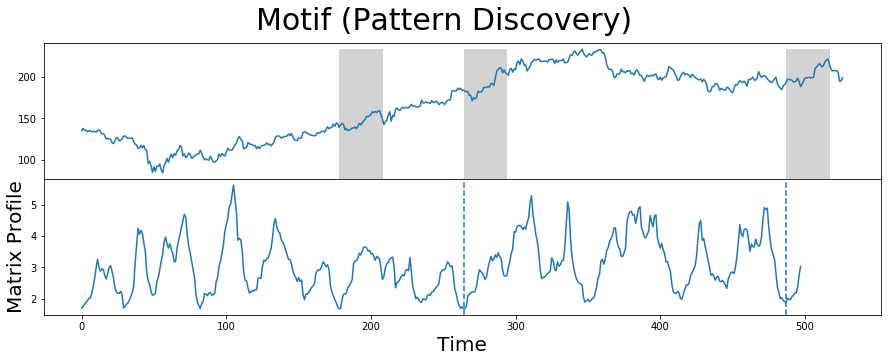

In [13]:
#most Similar=computing the pairwise z-normalized Euclidean distances
fig,axs=plt.subplots(2,sharex=True,gridspec_kw={'hspace':0},figsize=(15,5))
plt.suptitle('Motif (Pattern Discovery) ',fontsize='30')
axs[0].plot(x['Close'].values)
height=x['Close'].max()
rect=Rectangle((motif_idx,0),m,height,facecolor='lightgrey')
axs[0].add_patch(rect)
rect=Rectangle((nearest_neighbor_idx1,0),m,height,facecolor='lightgrey')
axs[0].add_patch(rect)
rect=Rectangle((nearest_neighbor_idx2,0),m,height,facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time',fontsize='20')
axs[1].set_ylabel('Matrix Profile',fontsize='20')
axs[1].axvline(x=motif_idx,linestyle='dashed')
axs[1].axvline(x=nearest_neighbor_idx1,linestyle='dashed')
axs[1].plot(mp[:,0])
plt.show()

264 487.0


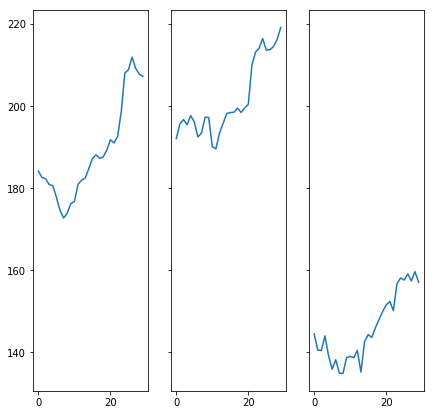

In [14]:
fig,ax=plt.subplots(1,3,figsize=(7,7),sharey=True)
values=x['Open'].to_numpy()
print(motif_idx,nearest_neighbor_idx1)
nearest_neighbor_idx1=nearest_neighbor_idx1.astype(np.int32)
nearest_neighbor_idx2=nearest_neighbor_idx2.astype(np.int32)
y1=values[motif_idx:motif_idx+m]
y2=values[nearest_neighbor_idx1:nearest_neighbor_idx1+m]
y3=values[nearest_neighbor_idx2:nearest_neighbor_idx2+m]
ax[0].plot(y1)
ax[1].plot(y2)
ax[2].plot(y3)

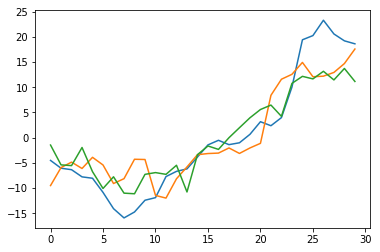

In [15]:
y1_norm=y1-y1.mean()
y2_norm=y2-y2.mean()
y3_norm=y3-y3.mean()
plt.plot(y1_norm,label='y1')
plt.plot(y2_norm,label='y2')
plt.plot(y3_norm,label='y3')
plt.show()